In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
fidParams={'Omega_k': 0.0,'Omega_b': 0.05,'Omega_c': 0.26, 
           'w0': -1.0, 'h': 0.6727, 'sigma8':0.8, 'n_s': 0.9645}
fidCosmo=ccl.Cosmology(**fidParams)
Nk=100; kmin=0.01;kmax=0.2 ### In Mpc!
ks=np.linspace(kmin,kmax,Nk)
kperp=np.outer(ks,np.ones(Nk))
kpar=np.outer(np.ones(Nk),ks)
kk=np.sqrt(kperp**2+kpar**2)

In [3]:
def Sigma8(params,z=0):
    cosmo=ccl.Cosmology(**params)
    return ccl.sigmaR(cosmo,8/cosmo['h'],1/(1+z))
def Sigma12(params,z=0):
    cosmo=ccl.Cosmology(**params)
    return ccl.sigmaR(cosmo,12,1/(1+z))

In [4]:
def MakePred (z,f,b,trueParams, fidShape=False):
    trueCosmo=ccl.Cosmology(**trueParams)
    a_=1/(1+z)
    radscale = 1/ (trueCosmo['h']*ccl.h_over_h0(trueCosmo,a_)/(fidCosmo['h']*ccl.h_over_h0(fidCosmo,a_)))
    transcale = ccl.comoving_angular_distance(trueCosmo,a_)/ccl.comoving_angular_distance(fidCosmo,a_)
    kpar_here = kpar*radscale
    kperp_here = kperp*transcale
    kk_here = np.sqrt(kperp_here**2+kpar_here**2)
    mu_here = kpar_here/kk_here
    if fidShape:
        pred=ccl.linear_matter_power(fidCosmo,trueCosmo['h']/fidCosmo['h']*kk_here.flatten(),
                                     a_).reshape(kk_here.shape)*(b+f*mu_here**2)**2
        pred*=(trueParams['sigma8']/fidParams['sigma8'])**2
    else:
        pred = ccl.linear_matter_power(trueCosmo,kk_here.flatten(),a_).reshape(kk_here.shape)*(b+f*mu_here**2)**2
    return pred
    
    

In [5]:
trueParams=copy.copy(fidParams)
trueParams['h']=0.72
trueParams2=copy.copy(fidParams)
trueParams2['h']=0.70
trueParams2['Omega_c']: 0.29
trueParams2['w0']: -1.1
trueParams2['sigma8']*=Sigma8(trueParams)/Sigma8(trueParams2)
trueParams3=copy.copy(trueParams2)
trueParams3['sigma8']*=Sigma12(trueParams)/Sigma12(trueParams2)
for pars in [trueParams,trueParams2,trueParams3]:
    print (Sigma8(pars,0.5),Sigma12(pars,0.5),Sigma8(pars,0.0),Sigma12(pars,0.0))

0.6162720443690055 0.5836499113012763 0.8 0.7576522954551598
0.6162728960761363 0.5956235963263008 0.8 0.7731946027400376
0.6038849374843234 0.5836507179236046 0.7839188662416431 0.7576522954551597


1.016669928415972
1.0588092307348114


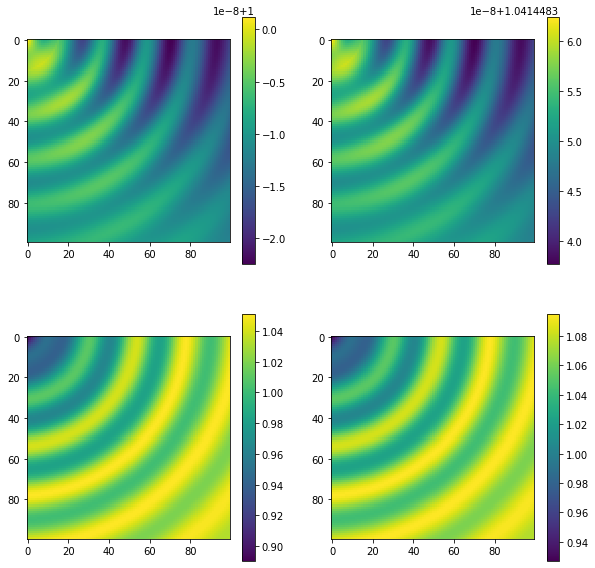

In [6]:
## Andreu's point
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(MakePred(0.001,1,1,trueParams,fidShape=True)/MakePred(0.001,1,1,trueParams2,fidShape=True))
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(MakePred(0.001,1,1,trueParams,fidShape=True)/MakePred(0.001,1,1,trueParams3,fidShape=True))
plt.colorbar()
## Zheng's point
plt.subplot(2,2,3)
toplot=MakePred(0.001,1,1.0,trueParams)/MakePred(0.001,1,1,trueParams2)
plt.imshow(toplot)
print(toplot.mean())
plt.colorbar()
plt.subplot(2,2,4)
toplot=MakePred(0.001,1,1.0,trueParams)/MakePred(0.001,1,1,trueParams3)
plt.imshow(toplot)
print(toplot.mean())
plt.colorbar()


In [7]:
###
#Same thing at z=0.5
zzx=1.0
trueParams=copy.copy(fidParams)
trueParams['h']=0.72
trueParams2=copy.copy(fidParams)
trueParams2['h']=0.70
trueParams2['Omega_c']: 0.29
trueParams2['w0']: -1.1
trueParams2['sigma8']*=Sigma8(trueParams,zzx)/Sigma8(trueParams2,zzx)
trueParams3=copy.copy(trueParams2)
trueParams3['sigma8']*=Sigma12(trueParams,zzx)/Sigma12(trueParams2,zzx)
for pars in [trueParams,trueParams2,trueParams3]:
    print (Sigma8(pars,zzx),Sigma12(pars,zzx),Sigma8(pars,0.0),Sigma12(pars,0.0))

0.4867617621759589 0.46099520806551725 0.8 0.7576522954551598
0.48676176217595896 0.4704519591683514 0.799996574584854 0.7731912920994086
0.4769771609184525 0.4609952080655172 0.7839155096821959 0.7576490513630992


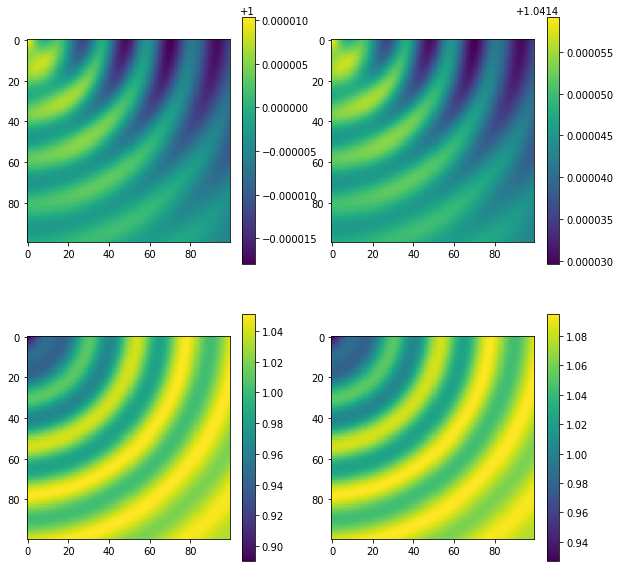

In [8]:
## Andreu's point
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(MakePred(zzx,1,1,trueParams,fidShape=True)/MakePred(zzx,1,1,trueParams2,fidShape=True))
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(MakePred(zzx,1,1,trueParams,fidShape=True)/MakePred(zzx,1,1,trueParams3,fidShape=True))
plt.colorbar()
## Zheng's point
plt.subplot(2,2,3)
plt.imshow(MakePred(zzx,1,1.0,trueParams,fidShape=False)/MakePred(zzx,1,1,trueParams2,fidShape=False))
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(MakePred(zzx,1,1.0,trueParams,fidShape=False)/MakePred(zzx,1,1,trueParams3,fidShape=False))
plt.colorbar()
## Zheng's plot